In [1]:
import json, requests, os, time
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
import pandas as pd

from dGbyG.Chemistry.Compound import Compound
from dGbyG.Chemistry.Reaction import Reaction
from dGbyG.utils.constants import *
from dGbyG.utils.func import *
from dGbyG.config import *

In [2]:
mol = to_mol('C00037', cid_type='kegg')
m = Compound(mol)

In [3]:
get_pKa(m, source='chemaxon')

{'basicValuesByAtom': [{'atomIndex': 7, 'value': 9.24}],
 'acidicValuesByAtom': [{'atomIndex': 1, 'value': 2.31}],
 'maxBasicValue': 9.24,
 'minAcidicValue': 2.31}

In [4]:
condition1 = default_condition.copy()
condition1['pH'] = 5.0

In [5]:
condition1

{'T': 298.15, 'pH': 5.0, 'I': 0.25, 'pMg': 14.0}

In [6]:
m.transform(default_condition, condition1)

AttributeError: 'Compound' object has no attribute 'can_be_transform'

In [ ]:
m.Smiles

'[H]OC(=O)C([H])([H])N([H])[H]'

In [ ]:
mm = m.mol
atom = mm.GetAtomWithIdx(4)
print(atom.GetSymbol())
atom.SetFormalCharge(0)
atom.GetNumExplicitHs()
atom.GetNumImplicitHs()
atom.SetNumExplicitHs(0)
Chem.SanitizeMol(mm)

N


rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [ ]:
r = '[H]OC([H])([H])[C@@]([H])(O[H])C(=O)[C@]([H])(O[H])[C@]([H])(O[H])C([H])([H])OP(=O)(O[H])O[H] = [H]OC([H])([H])C1(O[H])O[C@]([H])(C([H])([H])OP(=O)(O[H])O[H])[C@@]([H])(O[H])[C@]1([H])O[H]'
#r = 'C01644 = C00001'

In [ ]:
R = Reaction(r)

In [ ]:
R.cid_type = 'smiles'

In [ ]:
R.rxnSmiles

{'[H]OC([H])([H])[C@@]([H])(O[H])C(=O)[C@]([H])(O[H])[C@]([H])(O[H])C([H])([H])OP(=O)(O[H])O[H]': -1,
 '[H]OC([H])([H])C1(O[H])O[C@]([H])(C([H])([H])OP(=O)(O[H])O[H])[C@@]([H])(O[H])[C@]1([H])O[H]': 1}

In [ ]:
R.can_be_transform

False

In [ ]:
R.transform(condition1=default_condition, condition2=default_condition)

False

In [ ]:
a = parse_equation(r)

In [ ]:
for x in zip(a.items(),[0,9,8]):
    print(x)

(('C00001', -0.2), 0)
(('C00002', -2.0), 9)
(('C00003', 1), 8)


In [ ]:
d = pd.read_csv(kegg_additions_csv_path, index_col=0)

In [ ]:
ddGf_to_dissociation(7, [1.8, 6.95, 12.89], T=298.15)


-31.529813690561955

In [ ]:
ddGf_to_aqueous(pH=7, pMg=3, ionic_strength_M=1, T=default_T, net_charge=-1, num_H=2, num_Mg=0) - ddGf_to_aqueous(pH=7, pMg=3, ionic_strength_M=0.25, T=default_T, net_charge=-1, num_H=2, num_Mg=0)

0.31141976940365623

In [ ]:
np.array([2,False,True, np.nan])

array([ 2.,  0.,  1., nan])

In [ ]:
m0 = Compound(to_mol('[H]OC(=O)C(=O)C([H])([H])C([H])([H])C([H])([H])C(=O)O[H]', cid_type='smiles'))

In [12]:
get_pKa(m0, 298.15)

{'structure': '[H]OC(=O)C(=O)C([H])([H])C([H])([H])C([H])([H])C(=O)O[H]',
 'basicValuesByAtom': [{'atomIndex': 5, 'value': -9.65}],
 'acidicValuesByAtom': [{'atomIndex': 1, 'value': 2.88},
  {'atomIndex': 17, 'value': 4.7}],
 'maxBasicValue': -9.65,
 'minAcidicValue': 2.88}

In [44]:
m0 = Chem.RemoveAllHs(m0)

In [42]:
Compound(m0).Smiles

'O=P(O)(O)O'

In [46]:
Compound(m0).Smiles

'O=P([O-])(O)O'

In [55]:
rdMolStandardize.StandardizeSmiles([H]OP([O-])(=O)O[H])
Standardizer(m0)
#standardize.Standardizer(m0)

In [57]:
rdMolStandardize.StandardizeSmiles('[H]OP([O-])(=O)O[H]')

[17:40:47] Initializing MetalDisconnector
[17:40:47] Running MetalDisconnector
[17:40:47] Initializing Normalizer
[17:40:47] Running Normalizer


'O=P([O-])(O)O'

[17:42:41] Running Uncharger
[17:42:41] Removed negative charge.


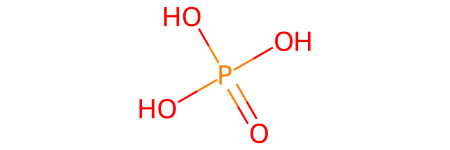

In [61]:
u = rdMolStandardize.Uncharger()
u.uncharge(m0)

In [16]:
a = set([0,4])

In [26]:
b = *[4,6,3]

SyntaxError: can't use starred expression here (604675825.py, line 1)

In [24]:
a.add(**b)

TypeError: set.add() argument after ** must be a mapping, not list

In [26]:
time.sleep(10)